<a href="https://colab.research.google.com/github/Jinukki/KJU/blob/master/3minute_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Ch04. 패션 아이템을 구분하는 DNN</b>

### 앞서 배운 인공 신경망을 이용하여 Fashion MNIST 데이터 셋 안의 패션 아이템을 구분해 보도록 하자.
 - Fashion MNIST 데이터셋 알아보기
 - 인공 신경망으로 패션 아이템 분류하기
 - 성능 측정하기
 - 과적합과 드롭아웃

 ---

 > ## Fashion MNIST 데이터셋 알아보기

 #### <b>데이터셋</b>은 우리가 풀고자 하는 문제를 정의한다. 문제 정의가 잘못되면 아무리 풀이를 잘 해도 별 의미가 없기 때문에 데이터셋을 관찰 및 관리하는 기술은 매우 중요하다.
 #### Fashion MNIST 는 28x28픽셀 70,000개의 흑백 이미지로 구성되며 신발, 드레스, 가방 등 총 10가지 카테고리가 존재한다.

 #### 딥러닝 모델 학습에 앞서 데이터 가공과정을 먼저 거쳐야 한다. 파이토치의 이미지 처리용 툴인 토치비전(torchvision)이 이 데이터셋을 자동으로 내려받고 학습 데이터를 나누는 일까지 도와줄 것이다. 이미지 데이터를 다루기 위한 파이토치와 토치비전의 몇 가지 모듈을 알아보자.

  - torch.utils.data : 데이터셋의 표준 정의, 데이터셋을 불러오고 자르고 섞는 도구들이 들어있는 모듈.
   - torch.utils.data.Dataset : 파이토치 모델 학습을 위한 데이터셋의 표준을 정의.
   - torch.utils.data.DataLoader : Dataset 모듈을 상속하는 클래스에서 학습에 필요한 데이터 로딩.
  - torchvision.datasets : 위의 data.Dataset을 상속하는 이미지 데이터셋 모음.
  - torchvision.transforms : 이미지 변환 필터(텐서변환, 크기조절 등)를 담고 있음.
  - torchvision.utils :이미지 데이터 저장 및 시각화.

In [39]:
pip install torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [0]:
# 토치비전과 파이토치 패키지 불러오기
from torchvision import datasets, transforms, utils
from torch.utils import data

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 이미지를 텐서로 변환하는 코드 설정
transform = transforms.Compose([transforms.ToTensor()])

#### 토치비전 Transforms에서 자주 쓰이는 기능들은 다음과 같다.
 - ToTensor : 이미지를 파이토치 텐서로 변환
 - Resize : 이미지 크기 조정
 - Normalize : 주어진 평균과 표준편차를 이용하여 정규화
 - RandomHorizontalFlip : 무작위로 이미지의 좌우를 뒤집음
 - RandomCrop : 이미지를 무작위로 자름.

In [0]:
# Fashion MNIST 데이터셋 가져오기
# 학습용 트레닝 셋
trainset=datasets.FashionMNIST(root='./.data/', train=True, download=True, transform=transform)
# train에 대한 True/False 설정을 통해 훈련/평가 데이터 구분, 이미지 변환은 위에서 설정한 transform코드 이용

# 성능 평가용 데이터셋
testset=datasets.FashionMNIST(root='./.data/', train=False, download=True, transform=transform)

#### 앞에서 언급하였듯이 torchvision.datasets로 생성된 객체는 파이토치 내부의 torch.utils.data.Dataset을 상속한다. 때문에 데이터셋을 배치 단위로 쪼개고 학습 시 반복문 안에서 데이터를 공급해주는 DataLoader 클래스를 이용할 수 있다. DataLoader의 매개변수에 앞서 불러온 데이터셋을 넣어주고 배치 크기를 지정해준다.

In [0]:
batch_size=16
train_loader = data.DataLoader(dataset=trainset, batch_size=batch_size)
test_loader= data.DataLoader(dataset=testset, batch_size=batch_size)

#### 이제 편하게 데이터를 뽑아쓸 수 있다. 배치 1개만 뽑아서 데이터가 어떻게 생겼는지 살펴보자.

In [0]:
# iter함수는 전달된 Data를 반복반환
dataiter = iter(train_loader)
# next함수로 반복자를 입력받아 출력해야 할 요소를 설정
images, labels = next(dataiter) # images, labels 출력

#### 앞에서 가져온 배치의 이미지들을 전체적으로 살펴보자. 토치비전의 utils.make_grid() 함수를 이용하면 여러 이미지들을 하나의 이미지로 만들 수 있다. 이 때, img는 파이토치 텐서이기 때문에 맷플롯립과 호환이 되는  넘파이 행렬로 바꿔준다. 또한 맷플롯립이 인식하는 차원의 순서가 다르므로 np.transpose() 함수를 이용하여 첫 번재(0번째) 차원을 맨뒤로 보낸다.

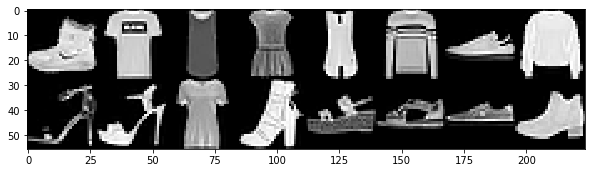

In [46]:
img = utils.make_grid(images, padding=0)
npimg = img.numpy() # img를 넘파이 행렬로 변환
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(npimg, (1,2,0))) # 첫번째, 두번째 차원을 읽어 이미지로 나타냄
plt.show()

In [47]:
print(img.size())
print(npimg.shape) # np.transpose 함수를 이용하여 맷플롯립에서 (56, 224을 읽음)

torch.Size([3, 56, 224])
(3, 56, 224)


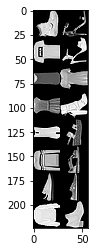

In [48]:
plt.imshow(np.transpose(npimg,(2,1,0)))
plt.show()

In [49]:
# 레이블 출력
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


#### 이미지 클래스들은 '티셔츠/윗옷', '바지', '스웨터' 등의 10가지이다. 위처럼 숫자 번호로 주어진 레이블을 해석하기 편하도록 딕셔너리를 생성하자.

In [0]:
CLASSES={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

In [51]:
# 앞에서 출력한 labels의 영문 텍스트 출력
for label in labels:
    index=label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


#### 이미지 데이터는 가로, 세로, 색상의 3차원으로 표현되며, 가로세로는 픽셀 수, 색상값은 흑백 사진이므로 1가지 숫자로 나타낼 수 있다. FashionMNIST에서 이미지 크기는 28x28, 색상 채널은 1가지이므로 입력 x의 특징값 총 개수는 28x28x1, 즉 784개이다.

#### 개별 이미지를 꺼내 보도록 하자. 데이터셋에서 첫 번째 이미지를 꺼내고 squeeze() 와 numpy() 함수를 적용하여 맷플롯립에 적용한다. 또한 앞에서 만들어 둔 딕셔너리를 이용하여 레이블을 나타낸다.

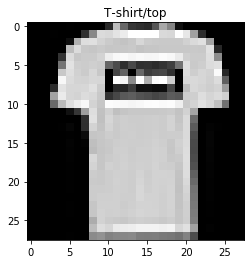

In [52]:
idx=1
item_img = images[idx] # 앞의 배치(16개) 이미지에서 2번째 이미지 출력
item_npimg = item_img.squeeze().numpy() # 크기가 1인 차원 삭제(28x28 이미지로 변경)
plt.title(CLASSES[labels[idx].item()]) # item함수는 값이 하나인 텐서를 스칼라값으로 출력
plt.imshow(item_npimg, cmap='gray') # matplotlib color 이용
plt.show()

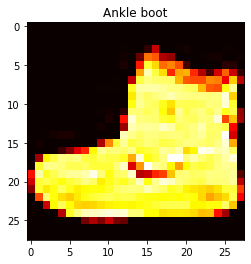

In [53]:
idx=0
item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap='hot')
plt.show()

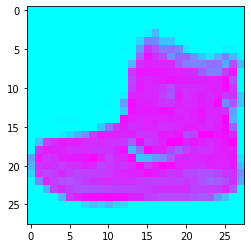

In [54]:
plt.imshow(item_npimg, cmap='cool')
plt.show()

---

> ## 인공 신경망으로 패션 아이템 분류하기

#### 이번에는 패션 아이템 이미지를 인식하여 레이블을 예측하는 기본적인 심층 인공 신경망(Deep Neural Network, DNN)을 만들어 보자.

#### 먼저 파이토치, 인공 신경망 모델의 재료들을 담고 있는 nn 모듈, 최적화를 위한 optim 모듈, nn모듈의 함수 버전인 functional을 F로 불러온다. 또한 데이터셋을 다루기 위해 transforms와 datasets를 임포트한다.

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [0]:
# CUDA(pytorch에서 GPU를 사용하게 해주는 도구)설치 여부를 기준으로 GPU / CPU 사용 결정
USE_CUDA = torch.cuda.is_available()
# DEVICE 변수를 통해 나중에 텐서 및 가중치 연산에서 GPU / CPU 사용결정
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

In [57]:
USE_CUDA

False

In [0]:
# 이폭은 학습 데이터 전체를 총 몇 번이나 볼 것인가에 대한 설정
EPOCHS = 30
BATCH_SIZE = 64

#### 이미지 분류는 한장의 이미지를 받아 이 이미지가 어느 클래스(레이블)에 속하는지 알려주는 문제이다.

#### 이제 신경망을 구현해 보자. 모델은 입력 x와 레이블 y를 받아 학습한 다음, 새로운 x가 왔을 때 어떤 패션 아이템인지 예측할 것이다. 우리가 사용할 모델은 레이어가 3개인 3층 인공 신경망이다.

#### 먼저 생성자에 우리 모델의 가중치 변수들이 들어가는 연산을 선언해야 한다. nn.Linear 클래스는 선형결합을 수행하는 객체를 만든다.

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
# 함수 fc1()은 픽셀값 784개를 입력받아 가중치를 행렬곱하고 편향을 더해 값 256개를 출력
    self.fc1 = nn.Linear(784, 256)
# fc2()와 fc3() 함수를 거쳐 마지막에 값 10개를 출력
    self.fc2 = nn.Linear(256, 128)
# 출력값 10개는 각각의 클래스를 나타내며 가장 큰 값이 이 모델의 예측값
    self.fc3 = nn.Linear(128, 10)

# 순전파
  def forward(self, x):
    x = x.view(-1, 784)
    x = F.relu(self.fc1(x)) # Relu 활성화 함수 사용
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [0]:
# 모델 선언
# CUDA를 사용할 경우 GPU를 아닐 경우 CPU로 보내도록 설정
model = Net().to(DEVICE) # to함수는 모델의 파라미터들을 지정한 장치의 메모리로 보냄

# 최적화 알고리즘으로 파이토치 내장 모듈인 optim.SGD(확률적 경사하강법) 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)
# model.parameters()는 모델 내부의 정보를 넘겨줌, lr=학습률

#### 학습은 데이터를 보고 모델의 가중치를 조절하는 작업을 반복하며 이루어진다. 학습에 들어가는 모든 연산은 train() 함수 안에서 해결할 것이다.

In [0]:
def train(model, train_loader, optimizer): # 각 인자는 모델, 데이터 공급, 최적화 역할
  model.train() # 모델을 학습 모드로 설정
# 배치마다의 data, target에 대한 정보를 DEVICE로 보냄
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(DEVICE), target.to(DEVICE)
# 반복 때마다 기울기를 새로 계산(누적하지 않음)하므로 zero_grad() 설정
    optimizer.zero_grad()
    output=model(data)
# 교차 엔트로피 사용하여 오차 구함
# loss는 미니배치 64개의 오차들의 평균인 하나의 숫자
    loss=F.cross_entropy(output, target)
# backward 함수를 실행하면 자동으로 기울기가 계산
    loss.backward()
# 계산한 기울기를 앞서 정의한 알고리즘(SGD)에 맞추어 가중치 수정(매개변수 갱신)
    optimizer.step()

#### 우리가 원하는 모델은 학습 데이터에 최적화한 모델이 아니라 모든 데이터에서 높은 성능을 보이는 모델이다. 세상에 존재하는 모든 데이터에 최적화하는 것을 <b>일반화(generalization)</b>라고 한다. 또한 학습 데이터를 기반으로 한 모델이 학습하지 않은 데이터에 얼마나 적응하는지를 수치로 나타낸 것을 <b>일반화 오류(generalization error)</b>라고 한다. 일반화 오류는 학습과 실제 성능의 괴리를 뜻하므로 작을수록 좋다.

#### 현실적으로 세상의 모든 데이터를 모을 수 없으므로 보통 학습 데이터의 일부를 떼어내어 평가용 데이터셋을 마련한다. 이를 보통 테스트셋(test set)이라고도 하며, 모델이 학습 과정에서 본 적이 없는 실제 세상의 모든 데이터를 대표한다.

#### Fashion MNIST 데이터는 비교적 규모가 작은 데이터셋으로 학습/테스트 두가지로 나뉘어 있지만 일반적인 머신러닝 데이터셋은 학습, 검증, 테스트 3단계로 나뉜다. 각각의 역할은 아래와 같다.
 - 학습용 데이터셋 : 가중치 조절
 - 검증용 데이터셋 : 배치 크기와 모델 설계 같은 하이퍼파라미터 조절
 - 테스트용 데이터셋 : 성능 보고

In [0]:
# 이폭이 끝날 때마다 테스트셋으로 모델의 성능 측정하는 evaluate 함수 생성
def evaluate(model, test_loader): # 평가가 목적이므로 최적화는 필요 없음
    model.eval() # 모델을 평가 모드로 변경
    test_loss=0
    correct=0
# 평가 과정에서는 기울기를 계산하지 않아도 됨
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output=model(data)
# 평가를 위해 미니배치들의 평균 대신 합을 받아오도록 reduction='sum' 설정, 즉 모든 오차의 합 출력
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
# 예측값. output.max()는 가장 큰 값과 그 인덱스를 출력. 그 중 인덱스 이용
            pred=output.max(1,keepdim=True)[1]
# eq함수는 일치하면 1, 아니면 0 출력. sum함수로 배열 내 값 모두 더하여 배치에서 모델이 정답을 맞힌 개수 구함
            correct+=pred.eq(target.view_as(pred)).sum().item()
# 총 정답 평균을 구하여 정확도를 구함
    test_loss /= len(test_loader.dataset)
    test_accuracy=100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [63]:
for epoch in range(1,EPOCHS+1):
    train(model, train_loader, optimizer) # 훈련 후 평가
    test_loss, test_accuracy=evaluate(model, test_loader)
# 오차는 소숫점 4자리까지, 정확도는 소숫점 2자리까지
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5572, Accuracy: 80.46%
[2] Test Loss: 0.4866, Accuracy: 82.48%
[3] Test Loss: 0.4510, Accuracy: 83.82%
[4] Test Loss: 0.4263, Accuracy: 84.84%
[5] Test Loss: 0.4055, Accuracy: 85.52%
[6] Test Loss: 0.3935, Accuracy: 85.89%
[7] Test Loss: 0.3837, Accuracy: 86.09%
[8] Test Loss: 0.3759, Accuracy: 86.47%
[9] Test Loss: 0.3702, Accuracy: 86.56%
[10] Test Loss: 0.3652, Accuracy: 86.68%
[11] Test Loss: 0.3596, Accuracy: 86.99%
[12] Test Loss: 0.3536, Accuracy: 87.33%
[13] Test Loss: 0.3500, Accuracy: 87.49%
[14] Test Loss: 0.3457, Accuracy: 87.59%
[15] Test Loss: 0.3443, Accuracy: 87.62%
[16] Test Loss: 0.3449, Accuracy: 87.66%
[17] Test Loss: 0.3438, Accuracy: 87.72%
[18] Test Loss: 0.3419, Accuracy: 88.03%
[19] Test Loss: 0.3423, Accuracy: 87.93%
[20] Test Loss: 0.3418, Accuracy: 87.94%
[21] Test Loss: 0.3403, Accuracy: 88.00%
[22] Test Loss: 0.3419, Accuracy: 88.06%
[23] Test Loss: 0.3406, Accuracy: 88.08%
[24] Test Loss: 0.3400, Accuracy: 88.10%
[25] Test Loss: 0.3417, A

---

> ## 과적합과 드롭아웃

#### 머신러닝 모델에서 너무 학습 데이터에만 치중되어 테스트셋이나 시제 상황에서는 성능이 나오지 않는 것을 <b>과적합(overfitting)</b>이라고 한다. 이와 반대로 학습을 제대로 하지 않는 상황을 <b>과소적합(underfitting)</b>이라고 한다. 우리가 원하는 상태는 이 중간인 <b>일반화(generalization)</b>이다.

![DNN3](https://user-images.githubusercontent.com/52277776/73606763-05810d80-45f1-11ea-8425-9a1101ec84bd.jpg)

#### 앞에서 데이터셋을 학습, 검증, 테스트셋으로 나눈다고 하였다. 이는 과적합을 탐지하려는 노력의 일환이기도 하다. 학습 중간중간 검증용 데이터셋으로 과적합 상태를 확인한다. 검증 데이터셋에 대한 성능이 나빠지기 시작하기 직전이 가장 적합한 모델이라고 할 수 있는데, 이 타이밍에 모델을 저장하여 이용하는 것을 <b>조기 종료</b>라고 한다.

![DNN2](https://user-images.githubusercontent.com/52277776/73606759-00bc5980-45f1-11ea-88d7-bdcdc5d7fd2b.jpg)

#### 과적합 방지의 궁극적 방법은 세상의 모든 데이터를 모으는 것이지만 이는 부족하기에 이미 가진 데이터를 최대한 늘리는 방법을 시도한다.즉, 이미지 일부를 자르고, 돌리고, 뒤집는 등의 여러 방법을 사용한다. 여기에서는 간단히 좌우를 뒤집는 대칭이동 전략을 사용할 것이다.

In [0]:
# transform에 transforms.RandomHorizontalFlip() 추가 적용
trainset=datasets.FashionMNIST(root='./.data', train=True, download=True, transform=transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()]))
testset=datasets.FashionMNIST(root='./.data', train=False, download=True, transform=transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()]))

BATCH_SIZE=16
train_loader=data.DataLoader(dataset=trainset, batch_size=BATCH_SIZE)
test_loader=data.DataLoader(dataset=testset, batch_size=BATCH_SIZE)

dataiter=iter(train_loader)
images, labels=next(dataiter)

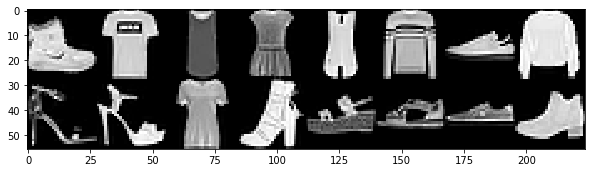

In [65]:
img=utils.make_grid(images, padding=0)
npimg=img.numpy()
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(npimg,(1,2,0)))
plt.show() # 랜덤으로 몇 개의 이미지의 좌우가 뒤집힌 것을 확인

In [0]:
# 아래와 같은 코드로 구현 가능
train_loader=torch.utils.data.DataLoader(datasets.MNIST('./.data', train=True, download=True, transform=transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=BATCH_SIZE, shuffle=True)
test_loader=torch.utils.data.DataLoader(datasets.MNIST('./.data', train=False, transform=transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=BATCH_SIZE, shuffle=True)

#### <b>드롭아웃(dropout)</b>이란 학습 진행과정에서 신경망의 일부를 사용하지 않고, 검증과 테스트 단계에서는 모든 뉴런을 사용하는 방법이다. 이는 학습에서 배재된 뉴런 외에 다른 뉴런들에 가중치를 분산시키고 개별 뉴런이 특정에 고정되는 현상을 방지한다.

![DNN1](https://user-images.githubusercontent.com/52277776/73606756-fef29600-45f0-11ea-83bc-c37d744e49d3.jpg)

In [0]:
class Net(nn.Module):
# 드롭아웃 확률 = 0.2로 설정, 즉 학습 시 20% 뉴련을 사용하지 않음
    def __init__(self, dropout_p=0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,10)
        self.dropout_p = dropout_p # 드롭아웃 확률
    
    def forward(self, x):
        x = x.view(-1,784)
        x = F.relu(self.fc1(x))
# 학습모델에서만 드롭아웃을 적용하기 위한 self.training 입력
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        x = self.fc3(x)
        return x

In [0]:
# 모델 선언에도 드롭아웃 확률 추가
model=Net(dropout_p=0.2).to(DEVICE)
optimizer=optim.SGD(model.parameters(), lr=0.01)

In [0]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target=data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output=model(data)
        loss=F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [0]:
def evaluate(model, test_loader):
    model.eval()
    test_loss=0
    correct=0
    with torch.no_grad():
        for data, target in test_loader :
            data, target=data.to(DEVICE), target.to(DEVICE)
            output=model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred=output.max(1,keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy=100.*correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [71]:
EPOCHS=50
for epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy=evaluate(model, test_loader)
    
    print('[{}] Test Loss : {:.4f}, Accuracy : {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss : 0.3131, Accuracy : 90.28%
[2] Test Loss : 0.2025, Accuracy : 93.56%
[3] Test Loss : 0.1718, Accuracy : 94.56%
[4] Test Loss : 0.1459, Accuracy : 95.37%
[5] Test Loss : 0.1318, Accuracy : 95.76%
[6] Test Loss : 0.1219, Accuracy : 96.02%
[7] Test Loss : 0.1151, Accuracy : 96.33%
[8] Test Loss : 0.1153, Accuracy : 96.26%
[9] Test Loss : 0.1021, Accuracy : 96.83%
[10] Test Loss : 0.1045, Accuracy : 96.62%
[11] Test Loss : 0.0967, Accuracy : 96.95%
[12] Test Loss : 0.0954, Accuracy : 97.06%
[13] Test Loss : 0.1006, Accuracy : 96.76%
[14] Test Loss : 0.0886, Accuracy : 97.21%
[15] Test Loss : 0.0898, Accuracy : 97.17%
[16] Test Loss : 0.0858, Accuracy : 97.33%
[17] Test Loss : 0.0855, Accuracy : 97.23%
[18] Test Loss : 0.0866, Accuracy : 97.31%
[19] Test Loss : 0.0846, Accuracy : 97.42%
[20] Test Loss : 0.0843, Accuracy : 97.48%
[21] Test Loss : 0.0825, Accuracy : 97.48%
[22] Test Loss : 0.0831, Accuracy : 97.48%
[23] Test Loss : 0.0821, Accuracy : 97.53%
[24] Test Loss : 0.0

---

## 지금까지 패션 데이터를 통해 간단한 딥러닝 모델을 학습하였다. 또한 데이터셋 관리법과 성능 측정법을 알아보았고 과적합과 이를 해결하기위한 데이터 늘리기 및 드롭아웃을 배워 보았다.